# UMI shoeboxer & results testing

In [1]:
from umi.umi import Umi
from utils.constants import *

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import h5py

c:\Users\zoelh\AppData\Local\anaconda3\envs\ml-for-bem\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package energy-pandas is out of date. Your version is 0.3.3, the latest is 0.3.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## 0. Open and build umi shoeboxes from uio

In [2]:
umi_test = Umi.open_uio(
        filename="D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi_data/Florianopolis/Florianopolis_Baseline.uio",
        epw_path="data/epws/global_epws_indexed/cityidx_0033_BRA_SP-São Paulo-Congonhas AP.837800_TRY Brazil.epw",
        archetypal_path="data/template_libs/cz_libs/residential/CZ3A.json",
    )

INFO:UMI:Opening UIO model...
DEBUG:UMI:TEMPORARY LOCATION C:\Users\zoelh\AppData\Local\Temp\tmpyfyph3oy
INFO:UMI:reading input file...
INFO:UMI:Read 3.8KB from D:\Users\zoelh\GitRepos\ml-for-building-energy-modeling\umi_data\Florianopolis\Florianopolis_Baseline.uio in 1.60 seconds
INFO:UMI:Successfully loaded EPW file Data for [So Paulo-Congonhas AP]
INFO:UMI:Opening archetpal templates at data/template_libs/cz_libs/residential/CZ3A.json
DEBUG:UMI:Fetching BuildingTemplate vector data from PROG_00_VINTAGE_00_MASS_0
DEBUG:UMI:Found facade with r_value 0.34 and tmass bin 3
DEBUG:UMI:Found slab with r_value 4.79
DEBUG:UMI:Found roof with r_value 2.87 and tmass bin 1
DEBUG:UMI:Using internal shgc calculation.
DEBUG:UMI:Fetching BuildingTemplate vector data from PROG_00_VINTAGE_00_MASS_1
DEBUG:UMI:Found facade with r_value 0.38 and tmass bin 1
DEBUG:UMI:Found slab with r_value 4.79
DEBUG:UMI:Found roof with r_value 2.87 and tmass bin 1
DEBUG:UMI:Using internal shgc calculation.
DEBUG:UMI:F

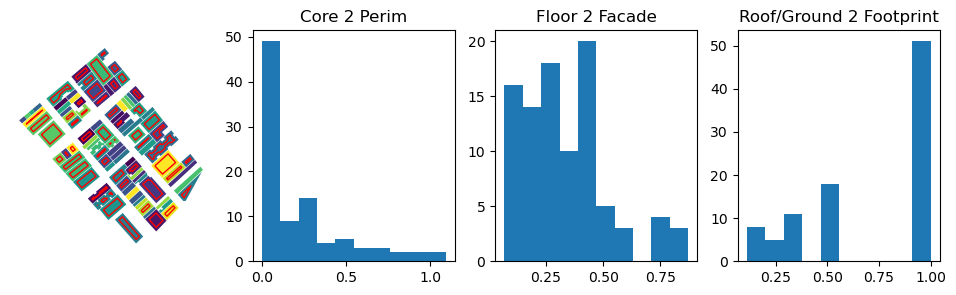

In [3]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
ax[0] = umi_test.visualize_2d(ax=ax[0])
ax[1].hist(umi_test.gdf["core_2_perim"])
ax[1].set_title("Core 2 Perim")
ax[2].hist(umi_test.gdf["floor_2_facade"])
ax[2].set_title("Floor 2 Facade")
ax[3].hist(umi_test.gdf["roof_2_footprint"])
ax[3].set_title("Roof/Ground 2 Footprint")
plt.show()

## 1. Open and build umi shoeboxes from .umi (unsimulated)

In [2]:
umi_test = Umi.open_umi(
        filename="D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi_data/Florianopolis/Florianopolis_Baseline_unsimulated.umi",
    )

INFO:UMI:reading input file...
DEBUG:UMI:TEMPORARY LOCATION C:\Users\zoelh\AppData\Local\Temp\tmp4bb6he8x
INFO:UMI:Successfully loaded EPW file Data for [Florianópolis]
INFO:UMI:Opening archetpal templates at template-library.json
INFO:UMI:Read 18.1KB from D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi_data/Florianopolis/Florianopolis_Baseline_unsimulated.umi in 0.45 seconds
DEBUG:UMI:Fetching BuildingTemplate vector data from RefBldgFullServiceRestaurantPost1980_v1.4_7.2_2A_USA_TX_HOUSTON
DEBUG:UMI:Found facade with r_value 3.76 and tmass bin 2
DEBUG:UMI:Found slab with r_value 0.08
DEBUG:UMI:Found roof with r_value 0.06 and tmass bin 3
DEBUG:UMI:Using internal shgc calculation.
DEBUG:UMI:Fetching BuildingTemplate vector data from RefBldgMediumOfficeNew2004_v1.4_7.2_2A_USA_TX_HOUSTON
DEBUG:UMI:Found facade with r_value 2.6 and tmass bin 3
DEBUG:UMI:Found slab with r_value 0.28
DEBUG:UMI:Found roof with r_value 3.53 and tmass bin 2
DEBUG:UMI:Using internal shgc calculation

In [3]:
shoebox_df, _, _, shoebox_weights =umi_test.allocate_unshaded_shoeboxes()

In [4]:
shoebox_weights

0       0.1
1       0.2
2       0.5
3       0.2
4       0.1
       ... 
1483    0.2
1484    0.1
1485    0.2
1486    0.5
1487    0.2
Length: 1488, dtype: float64

In [7]:
print(shoebox_df.shape)
shoebox_df.head()

(1488, 37)


,height,geometry,template,wwr,guid,footprint_area,cores,core_2_perim,floor_2_facade,floor_count,...,economizer,wall_r_val,wall_mass,roof_r_val,roof_mass,slab_r_val,shgc,window_u_val,visible_transmittance,orientation
0,33.6,"POLYGON ((-23.30420 15.93562, -12.98827 25.194...",RefBldgMidriseApartmentNew2004_v1.4_7.2_2A_USA...,0.4,8871aa84-b57c-9a46-a2ef-ccb8edbbac00,255.916544,"POLYGON ((-19.07577 15.69957, -13.18029 20.990...",0.623828,0.072682,11.0,...,0.0,3.04971,3.0,3.531932,2.0,0.283058,1.0,5.0,0.8,North
1,33.6,"POLYGON ((-23.30420 15.93562, -12.98827 25.194...",RefBldgMidriseApartmentNew2004_v1.4_7.2_2A_USA...,0.4,8871aa84-b57c-9a46-a2ef-ccb8edbbac00,255.916544,"POLYGON ((-19.07577 15.69957, -13.18029 20.990...",0.623828,0.072682,11.0,...,0.0,3.04971,3.0,3.531932,2.0,0.283058,1.0,5.0,0.8,East
2,33.6,"POLYGON ((-23.30420 15.93562, -12.98827 25.194...",RefBldgMidriseApartmentNew2004_v1.4_7.2_2A_USA...,0.4,8871aa84-b57c-9a46-a2ef-ccb8edbbac00,255.916544,"POLYGON ((-19.07577 15.69957, -13.18029 20.990...",0.623828,0.072682,11.0,...,0.0,3.04971,3.0,3.531932,2.0,0.283058,1.0,5.0,0.8,South
3,33.6,"POLYGON ((-23.30420 15.93562, -12.98827 25.194...",RefBldgMidriseApartmentNew2004_v1.4_7.2_2A_USA...,0.4,8871aa84-b57c-9a46-a2ef-ccb8edbbac00,255.916544,"POLYGON ((-19.07577 15.69957, -13.18029 20.990...",0.623828,0.072682,11.0,...,0.0,3.04971,3.0,3.531932,2.0,0.283058,1.0,5.0,0.8,West
4,33.6,"POLYGON ((-23.30420 15.93562, -12.98827 25.194...",RefBldgMidriseApartmentNew2004_v1.4_7.2_2A_USA...,0.4,8871aa84-b57c-9a46-a2ef-ccb8edbbac00,255.916544,"POLYGON ((-19.07577 15.69957, -13.18029 20.990...",0.623828,0.072682,11.0,...,0.0,3.04971,3.0,3.531932,2.0,0.283058,1.0,5.0,0.8,North


In [10]:
umi_test.building_gdf.head()

,height,geometry,template,wwr,guid,footprint_area,cores,core_2_perim,floor_2_facade,floor_count,roof_2_footprint,ground_2_footprint
0,33.6,"POLYGON ((-23.30420 15.93562, -12.98827 25.194...",RefBldgMidriseApartmentNew2004_v1.4_7.2_2A_USA...,0.4,8871aa84-b57c-9a46-a2ef-ccb8edbbac00,255.916544,"POLYGON ((-19.07577 15.69957, -13.18029 20.990...",0.623828,0.072682,11.0,0.090909,0.090909
1,5.6,"POLYGON ((-0.47467 76.78867, 8.23570 83.91156,...",RefBldgSecondarySchoolNew2004_v1.4_7.2_2A_USA_...,0.4,6b9bb478-9313-f249-8aa8-8faaf46b84bc,162.474120,"POLYGON ((3.58619 76.23407, 7.81345 79.69091, ...",0.382280,0.409941,2.0,0.500000,0.500000
2,5.6,"POLYGON ((58.33983 -42.10682, 88.07270 -15.249...",RefBldgFullServiceRestaurantPost1980_v1.4_7.2_...,0.4,41391093-5407-0a43-9cc6-312e66fcdd76,160.248477,POLYGON EMPTY,0.000000,0.325545,2.0,0.500000,0.500000
3,11.2,"POLYGON ((-41.41712 8.32300, -27.75720 20.0039...",RefBldgFullServiceRestaurantPost1980_v1.4_7.2_...,0.4,c01d47eb-099f-d548-b919-f634261aff69,168.469102,"POLYGON ((-37.09808 8.06901, -28.04000 15.8147...",0.317795,0.208989,4.0,0.250000,0.250000
4,3.0,"POLYGON ((-2.13750 23.85628, 12.71517 37.39238...",RefBldgFullServiceRestaurantPost1980_v1.4_7.2_...,0.4,739cd930-929f-f446-9cbd-1057856e207c,131.776061,"POLYGON ((2.10715 23.66572, 6.88553 28.02053, ...",0.062267,0.752649,1.0,1.000000,1.000000


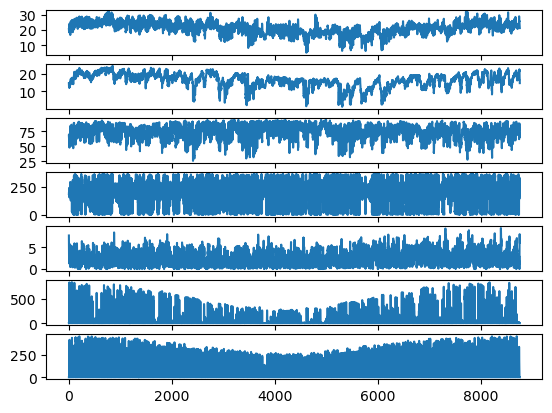

In [4]:
fig, ax = plt.subplots(umi_test.epw_array.shape[0], 1)
for i, row in enumerate(umi_test.epw_array):
    ax[i].plot(row)
plt.show()

In [24]:
print(umi_test.schedules_array.shape)
print(umi_test.schedules_array.min())
print(umi_test.schedules_array.max())

(6, 3, 8760)
0.0
0.966


In [26]:
umi_test.features_df

,people_density,lighting_power_density,equipment_power_density,infiltration_per_area,ventilation_per_floor_area,ventilation_per_person,ventilation_mode,heating_sp,cooling_sp,humid_max,...,heat_recovery,economizer,wall_r_val,wall_mass,roof_r_val,roof_mass,slab_r_val,shgc,window_u_val,visible_transmittance
RefBldgFullServiceRestaurantPost1980_v1.4_7.2_2A_USA_TX_HOUSTON,0.5380,24.40,475.00,0.816,0.0,0.0,2.0,20.5,24.5,81.0,...,0.0,0.0,3.763996,2.0,0.062544,3.0,0.077803,1.0,5.823529,0.8
RefBldgMediumOfficeNew2004_v1.4_7.2_2A_USA_TX_HOUSTON,0.0538,10.80,19.00,0.271,0.0,0.0,2.0,21.0,24.0,81.0,...,0.0,1.0,2.600731,3.0,3.531932,2.0,0.283058,1.0,4.800000,0.8
RefBldgMidriseApartmentNew2004_v1.4_7.2_2A_USA_TX_HOUSTON,0.0281,4.29,12.60,0.149,0.0,0.0,2.0,20.6,25.5,81.0,...,0.0,0.0,3.049710,3.0,3.531932,2.0,0.283058,1.0,5.000000,0.8
RefBldgQuickServiceRestaurantPost1980_v1.4_7.2_2A_USA_TX_HOUSTON,0.3870,16.00,864.00,1.070,0.0,0.0,2.0,20.0,25.0,81.0,...,0.0,0.0,3.763996,2.0,0.062544,3.0,0.077803,1.0,5.823529,0.8
RefBldgSecondarySchoolNew2004_v1.4_7.2_2A_USA_TX_HOUSTON,0.3750,12.50,23.90,0.110,0.0,0.0,2.0,19.5,24.9,81.0,...,0.0,0.0,2.600731,3.0,3.531932,2.0,0.283058,1.0,4.800000,0.8
RefBldgStand-aloneRetailPost1980_v1.4_7.2_2A_USA_TX_HOUSTON,0.1410,32.30,5.24,1.400,0.0,0.0,2.0,18.9,26.7,81.0,...,0.0,0.0,3.598762,0.0,5.552340,2.0,0.077803,1.0,5.823529,0.8


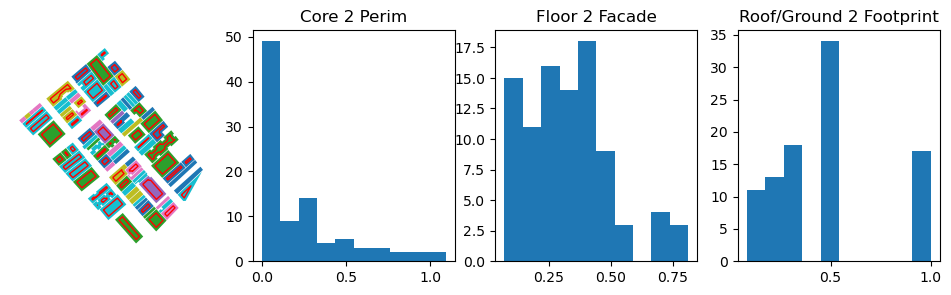

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
ax[0] = umi_test.visualize_2d(ax=ax[0])
ax[1].hist(umi_test.building_gdf["core_2_perim"])
ax[1].set_title("Core 2 Perim")
ax[2].hist(umi_test.building_gdf["floor_2_facade"])
ax[2].set_title("Floor 2 Facade")
ax[3].hist(umi_test.building_gdf["roof_2_footprint"])
ax[3].set_title("Roof/Ground 2 Footprint")
plt.show()

## 3. Open UMI v1 project

### Fetch all the shoeboxes and turn into epjsons

In [10]:
from pyumi import UmiProject
from pyumi.shoeboxer import ShoeBox
from pyumi.umi_project import ShoeBoxCollection

In [11]:
def fetch_shoeboxes(simulated_shoeboxdf):
    shoeboxes = ShoeBoxCollection()
    df = (
        simulated_shoeboxdf.reset_index()
        .groupby("ShoeboxPath")
        .first()
        .reset_index()
    )
    for _, row in df.iterrows():
        idf_path = row["ShoeboxPath"]
        shoeboxes[idf_path] = ShoeBox(idf_path)
    return shoeboxes

def set_energy_path(simulated_shoeboxdf, new_path):
    old_paths = simulated_shoeboxdf["ShoeboxPath"]
    new_paths = []

    new_path = os.path.normpath(new_path)
    to_match = new_path.split(os.sep)[-1]
    idx = old_paths[0].split("\\").index(to_match)
    for p in old_paths:
        p = p.split("\\")
        new_p = new_path
        for i in range(idx + 1, len(p)):
            new_p = os.path.join(new_p, p[i])
        new_paths.append(new_p)

    simulated_shoeboxdf["ShoeboxPath"] = new_paths
    return simulated_shoeboxdf

In [12]:
simulated_umi_path = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi_data/Florianopolis/Florianopolis_Baseline_simulated.umi"
energy_path = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi_data/Florianopolis/hourly/eplus"
simulated_umi = UmiProject.open(simulated_umi_path)

In [13]:
df = pd.DataFrame.from_dict(simulated_umi.sdl_common["shoebox-weights"])
simulated_shoeboxdf = df.merge(
    simulated_umi.gdf_world, how="left", left_on="ParentBuildingId", right_on="id"
)
simulated_shoeboxdf = set_energy_path(simulated_shoeboxdf, energy_path)
simulated_shoeboxdf.head()

,ParentBuildingId,PerimeterAreaWeight,CoreAreaWeight,PerimeterArea,CoreArea,Orientation,ClusterId,Roof2FloorRatio,Ground2FloorRatio,Floor2Fac,...,Height,Name,Occupancy,TemplateName,UseType,WwrE,WwrN,WwrS,WwrW,geometry
0,b8848bab-34b8-6b44-bb4c-43deca1051a6,5.817445,0.0,240.45439,0.0,West,Group0,0.5,0.5,0.450772,...,8.4,44,134,RefBldgSecondarySchoolNew2004_v1.4_7.2_2A_USA_...,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((741947.18906 -3055188.98301, 7..."
1,b8848bab-34b8-6b44-bb4c-43deca1051a6,3.878297,0.0,240.45439,0.0,West,Group0,0.5,0.5,0.450772,...,8.4,44,134,RefBldgSecondarySchoolNew2004_v1.4_7.2_2A_USA_...,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((741947.18906 -3055188.98301, 7..."
2,b8848bab-34b8-6b44-bb4c-43deca1051a6,3.878297,0.0,240.45439,0.0,South,Group0,0.5,0.5,0.450772,...,8.4,44,134,RefBldgSecondarySchoolNew2004_v1.4_7.2_2A_USA_...,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((741947.18906 -3055188.98301, 7..."
3,b8848bab-34b8-6b44-bb4c-43deca1051a6,5.817445,0.0,240.45439,0.0,South,Group0,0.5,0.5,0.450772,...,8.4,44,134,RefBldgSecondarySchoolNew2004_v1.4_7.2_2A_USA_...,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((741947.18906 -3055188.98301, 7..."
4,b8848bab-34b8-6b44-bb4c-43deca1051a6,1.939148,0.0,240.45439,0.0,South,Group0,0.5,0.5,0.450772,...,8.4,44,134,RefBldgSecondarySchoolNew2004_v1.4_7.2_2A_USA_...,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((741947.18906 -3055188.98301, 7..."


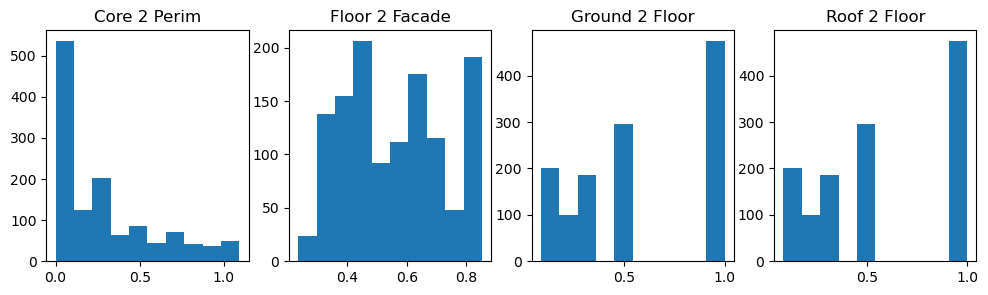

In [31]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
ax[0].hist(simulated_shoeboxdf["Core2Perimeter"])
ax[0].set_title("Core 2 Perim")
ax[1].hist(simulated_shoeboxdf["Floor2Fac"])
ax[1].set_title("Floor 2 Facade")
ax[2].hist(simulated_shoeboxdf["Ground2FloorRatio"])
ax[2].set_title("Ground 2 Floor")
ax[3].hist(simulated_shoeboxdf["Roof2FloorRatio"])
ax[3].set_title("Roof 2 Floor")
plt.show()

In [25]:
print(simulated_shoeboxdf.shape)
df = simulated_shoeboxdf.groupby("ShoeboxPath", as_index=False).first()
print(df.shape)

(1255, 25)
(64, 25)


In [10]:
simulated_shoeboxes = fetch_shoeboxes(df)

In [11]:
from archetypal import settings
import subprocess

settings.energyplus_location = Path("D:\EnergyPlusV22-2-0")
settings.ep_version = "22.2.0"

def convert(fullpath):
    # Define the command and its arguments
    output_directory, path = os.path.split(fullpath)
    cmd = (
        settings.energyplus_location
        / f"energyplus{'.exe' if os.name == 'nt' else ''}"
    )
    args = ["--convert-only", "--output-directory", output_directory, fullpath]

    # TODO change location of idf

    # Run the command
    with subprocess.Popen(
        [cmd] + args, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True
    ) as proc:
        for line in proc.stdout:
            print(line.strip())
        exit_code = proc.wait()

    # Check if the command was successful
    if exit_code == 0:
        pass
    else:
        print(f"Command failed with exit code {exit_code}.")
        raise RuntimeError(f"Failed to convert EpJSON to IDF.")
    
# def setup_update(shoeboxes_dict, updated_directory):
#     # Make list of files to convert
#     files_to_convert = list(shoeboxes_dict.keys())
#     with open(Path(updated_directory, "to_convert.lst"), "w") as f:
#         f.writelines(line + '\n' for line in files_to_convert)
# setup_update(simulated_shoeboxes, "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi_data/Florianopolis/eplus/converted")



In [12]:
# from IPython.display import clear_output
# # WARNING - TAKES A WHILE
# # Convert all the shoeboxes to idfs
# epjsons = []
# for sbname, sbidf in simulated_shoeboxes.items():
#     print(sbname)
#     sbidf.upgrade()
#     epjsonname = sbname.replace("idf", "epjson")
#     convert(sbname)
#     epjsons.append(epjsonname)
#     clear_output()

In [15]:
# d = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi_data/Florianopolis/"
# with open(Path(d, "umi_epjsonlist.txt"), "w") as f:
#     f.writelines(line + '\n' for line in epjsons)

In [30]:
d = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi_data/Florianopolis/"
with open(Path(d, "umi_epjsonlist.txt"), "r") as f:
    epjson_list = f.read()
    epjson_list = epjson_list.split("\n")

In [ ]:
# epjson_from_simulated_umi_results = {}
# for path in epjson_list:
#     # 

### Load all the eplus outputs

In [53]:
ENERGY_DIR = "ml-for-bem/umi/energy"
ENERGY_CSV_OUTPUTS = [
    "Date/Time",
    # "PERIM:Zone People Total Heating Energy [J](Hourly)",
    # "CORE:Zone People Total Heating Energy [J](Hourly)",
    # "PERIM:Zone Lights Electric Energy [J](Hourly)",
    # "CORE:Zone Lights Electric Energy [J](Hourly)",
    # "PERIM:Zone Electric Equipment Electric Energy [J](Hourly)",
    # "CORE:Zone Electric Equipment Electric Energy [J](Hourly)",
    # "PERIM:Zone Windows Total Transmitted Solar Radiation Energy [J](Hourly)",
    # "CORE:Zone Windows Total Transmitted Solar Radiation Energy [J](Hourly)",
    # "PERIM:Zone Mean Radiant Temperature [C](Hourly)",
    # "CORE:Zone Mean Radiant Temperature [C](Hourly)",
    # "PERIM:Zone Mean Air Temperature [C](Hourly)",
    # "PERIM:Zone Operative Temperature [C](Hourly)",
    # "CORE:Zone Mean Air Temperature [C](Hourly)",
    # "CORE:Zone Operative Temperature [C](Hourly)",
    # "PERIM:Zone Infiltration Total Heat Loss Energy [J](Hourly)",
    # "PERIM:Zone Infiltration Total Heat Gain Energy [J](Hourly)",
    # "PERIM:Zone Infiltration Air Change Rate [ach](Hourly)",
    # "CORE:Zone Infiltration Total Heat Loss Energy [J](Hourly)",
    # "CORE:Zone Infiltration Total Heat Gain Energy [J](Hourly)",
    # "CORE:Zone Infiltration Air Change Rate [ach](Hourly)",
    # "PERIM:Zone Air Temperature [C](Hourly)",
    # "PERIM:Zone Air Relative Humidity [%](Hourly)",
    # "CORE:Zone Air Temperature [C](Hourly)",
    # "CORE:Zone Air Relative Humidity [%](Hourly)",
    "PERIM IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)",
    "PERIM IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Cooling Energy [J](Hourly)",
    # "PERIM IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)",
    "CORE IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)",
    "CORE IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Cooling Energy [J](Hourly)",
    # "CORE IDEAL LOADS AIR:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)",
    # "DHW PERIM:Water Use Equipment Heating Energy [J](Hourly)",
    # "DHW CORE:Water Use Equipment Heating Energy [J](Hourly)",
]

def fetch_raw_shoebox_results(idf_path):
    csv_path = idf_path.replace("idf", "csv")
    try:
        pandas_df = pd.read_csv(csv_path)
        pandas_df.columns = pandas_df.columns.str.strip()
        cols = pandas_df.columns.tolist()
    except Exception as e:
        print(f"Error opening energy csv: {csv_path}")
        raise e

    # TODO: if there is no water use equipment this is not added to the idf and is not in the csv output
    # Temporary fix to add zeros if there is a missing entry
    if len(cols) != len(ENERGY_CSV_OUTPUTS):
        # print(f"Missing some outputs for {csv_path}")
        for col in ENERGY_CSV_OUTPUTS:
            if col not in cols:
                print(
                    f"Could not find results for {col} in {csv_path}. Assuming no energy use (zeros)."
                )
                pandas_df[col] = 0
        # reorganize columns in correct order
        pandas_df = pandas_df[ENERGY_CSV_OUTPUTS]
    new_cols = []
    for c in pandas_df.columns:
        if "[J]" in c:
            pandas_df[c] = pandas_df[c] * JOULES_TO_KWH
        c = c.split(" [")[0]
        new_cols.append(c)
    pandas_df.columns = new_cols
    return pandas_df

In [58]:
# Check with one shoebox
edf = fetch_raw_shoebox_results(simulated_shoeboxdf["ShoeboxPath"][0])
edf.describe()

,PERIM IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Heating Energy,PERIM IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Cooling Energy,CORE IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Heating Energy,CORE IDEAL LOADS AIR:Zone Ideal Loads Supply Air Total Cooling Energy
count,8760.0,8760.000000,8760.0,8760.000000
mean,0.0,0.089042,0.0,0.060820
std,0.0,0.121163,0.0,0.079270
min,0.0,0.000000,0.0,0.000000
25%,0.0,0.000000,0.0,0.000000
50%,0.0,0.000000,0.0,0.000000
75%,0.0,0.166338,0.0,0.121131
max,0.0,0.492293,0.0,0.216114


In [61]:
# Get results for all shoeboxes
raw_simulated_umi_results = {}
for path in simulated_shoeboxdf["ShoeboxPath"]:
    raw_simulated_umi_results[path] = fetch_raw_shoebox_results(path)

## 3. Use template map to build epjsons and run

In [46]:
df["ShoeboxPath"][0]

'D:\\Users\\zoelh\\GitRepos\\ml-for-building-energy-modeling\\umi_data\\Florianopolis\\hourly\\eplus\\Group0\\SAMPLE0\\40\\SAMPLE0.idf'

In [51]:
df["ShoeboxPath"][0]

'D:\\Users\\zoelh\\GitRepos\\ml-for-building-energy-modeling\\umi_data\\Florianopolis\\hourly\\eplus\\Group0\\SAMPLE0\\40\\SAMPLE0.idf'

In [55]:
parent_ids = simulated_shoeboxdf[simulated_shoeboxdf["ShoeboxPath"] == df["ShoeboxPath"][0]]["ParentBuildingId"].unique()

In [68]:
n_sbs = simulated_shoeboxdf[simulated_shoeboxdf["ParentBuildingId"].isin(parent_ids)].shape[0]
n_idfs = simulated_shoeboxdf[simulated_shoeboxdf["ParentBuildingId"].isin(parent_ids)]["ShoeboxPath"].unique().shape[0]

In [69]:
f"for {len(parent_ids)} buildings", f"{n_sbs} Shoeboxes", f"and {n_idfs} .idf files"

('for 27 buildings', '471 Shoeboxes', 'and 56 .idf files')

In [116]:
g0df = (
    simulated_shoeboxdf[simulated_shoeboxdf["ClusterId"] == "Group0"][
        [
            "ParentBuildingId",
            "Orientation",
            "ShoeboxPath",
            "PerimeterAreaWeight",
            "CoreAreaWeight",
            "PerimeterArea",
            "CoreArea",
            "Roof2FloorRatio",
            "Ground2FloorRatio",
            "Floor2Fac",
            "Core2Perimeter",
        ]
    ]
    .sort_values(["ParentBuildingId", "Orientation"])
    # .iloc[:20]
)
g0df["ShoeboxPath"] = g0df.ShoeboxPath.apply(lambda x: "-".join(x.split("\\")[-3:]))
g0df.groupby(["Orientation", "ShoeboxPath"]).count()

ParentBuildingId  PerimeterAreaWeight  \
Orientation ShoeboxPath                                                       
East        SAMPLE10-40-SAMPLE10.idf                12                   12   
            SAMPLE11-40-SAMPLE11.idf                14                   14   
            SAMPLE12-40-SAMPLE12.idf                11                   11   
            SAMPLE13-40-SAMPLE13.idf                17                   17   
            SAMPLE14-40-SAMPLE14.idf                24                   24   
...                                                ...                  ...   
West        SAMPLE60-40-SAMPLE60.idf                 6                    6   
            SAMPLE61-40-SAMPLE61.idf                 2                    2   
            SAMPLE62-40-SAMPLE62.idf                11                   11   
            SAMPLE63-40-SAMPLE63.idf                 3                    3   
            SAMPLE9-40-SAMPLE9.idf                   2                    2   

                                      CoreAreaWeight  PerimeterArea  CoreArea  \
Orientation ShoeboxPath                                                         
East        SAMPLE10-40-SAMPLE10.idf              12             12        12   
            SAMPLE11-40-SAMPLE11.idf              14             14        14   
            SAMPLE12-40-SAMPLE12.idf              11             11        11   
            SAMPLE13-40-SAMPLE13.idf              17             17        17   
            SAMPLE14-40-SAMPLE14.idf              24             24        24   
...                                              ...            ...       ...   
West        SAMPLE60-40-SAMPLE60.idf               6              6         6   
            SAMPLE61-40-SAMPLE61.idf               2              2         2   
            SAMPLE62-40-SAMPLE62.idf              11             11        11   
            SAMPLE63-40-SAMPLE63.idf               3              3         3   
            SAMPLE9-40-SAMPLE9.idf                 2              2         2   

                                      Roof2FloorRatio  Ground2FloorRatio  \
Orientation ShoeboxPath                                                    
East        SAMPLE10-40-SAMPLE10.idf               12                 12   
            SAMPLE11-40-SAMPLE11.idf               14                 14   
            SAMPLE12-40-SAMPLE12.idf               11                 11   
            SAMPLE13-40-SAMPLE13.idf               17                 17   
            SAMPLE14-40-SAMPLE14.idf               24                 24   
...                                               ...                ...   
West        SAMPLE60-40-SAMPLE60.idf                6                  6   
            SAMPLE61-40-SAMPLE61.idf                2                  2   
            SAMPLE62-40-SAMPLE62.idf               11                 11   
            SAMPLE63-40-SAMPLE63.idf                3                  3   
            SAMPLE9-40-SAMPLE9.idf                  2                  2   

                                      Floor2Fac  Core2Perimeter  
Orientation ShoeboxPath                                          
East        SAMPLE10-40-SAMPLE10.idf         12              12  
            SAMPLE11-40-SAMPLE11.idf         14              14  
            SAMPLE12-40-SAMPLE12.idf         11              11  
            SAMPLE13-40-SAMPLE13.idf         17              17  
            SAMPLE14-40-SAMPLE14.idf         24              24  
...                                         ...             ...  
West        SAMPLE60-40-SAMPLE60.idf          6               6  
            SAMPLE61-40-SAMPLE61.idf          2               2  
            SAMPLE62-40-SAMPLE62.idf         11              11  
            SAMPLE63-40-SAMPLE63.idf          3               3  
            SAMPLE9-40-SAMPLE9.idf            2               2  

[99 rows x 9 columns]

In [72]:
simulated_shoeboxdf[simulated_shoeboxdf["ShoeboxPath"] == df["ShoeboxPath"][0]][['ParentBuildingId', 'PerimeterAreaWeight',
       'CoreAreaWeight', 'PerimeterArea', 'CoreArea', 'Roof2FloorRatio', 'Ground2FloorRatio', 'Floor2Fac','Core2Perimeter']]

,ParentBuildingId,PerimeterAreaWeight,CoreAreaWeight,PerimeterArea,CoreArea,Roof2FloorRatio,Ground2FloorRatio,Floor2Fac,Core2Perimeter
798,11ed3672-e6fb-354f-9f76-fc3e8fbcd50b,47.030085,0.000000,194.838924,0.000000,1.000000,1.000000,0.393554,0.000000
1157,1b489621-09c7-c04c-84ba-813c4908d14a,11.374508,3.117481,1351.291608,370.356756,0.090909,0.090909,0.759536,0.274076
51,1bffad21-b8d4-0145-8a71-abe97df905ed,13.407604,0.000000,169.829648,0.000000,0.333333,0.333333,0.408930,0.000000
674,1cf6c185-9ef9-984f-bb1d-0faa206a5dd9,1.327168,0.000000,51.759547,0.000000,1.000000,1.000000,0.439621,0.000000
764,1d83cbc6-e4e0-e147-b2cc-923bdad660fc,2.461630,0.604433,172.314080,42.310336,1.000000,1.000000,0.443089,0.245542
521,256a3447-71e0-7943-b6ef-5de308106b12,4.259315,0.000000,106.482885,0.000000,1.000000,1.000000,0.387700,0.000000
724,2751d01d-c4ab-fb4f-b7ff-23be1e79ec72,20.133699,0.000000,57.045481,0.000000,1.000000,1.000000,0.305013,0.000000
399,2c6f9b46-92e1-d341-8bee-33b5fd917154,1.407738,0.000000,70.386892,0.000000,1.000000,1.000000,0.477721,0.000000
483,2ceeb525-d784-da41-84fc-0f11df21e1ec,3.220351,0.000000,77.288422,0.000000,1.000000,1.000000,0.540623,0.000000
230,30abb9d5-6cd7-894a-a727-17a77c1edac5,2.316416,0.734628,396.107142,125.621316,0.333333,0.333333,0.631216,0.317140


In [38]:
df.columns

Index(['ShoeboxPath', 'ParentBuildingId', 'PerimeterAreaWeight',
       'CoreAreaWeight', 'PerimeterArea', 'CoreArea', 'Orientation',
       'ClusterId', 'Roof2FloorRatio', 'Ground2FloorRatio', 'Floor2Fac',
       'Core2Perimeter', 'id', 'FloorCount', 'GrossFloorArea', 'Height',
       'Name', 'Occupancy', 'TemplateName', 'UseType', 'WwrE', 'WwrN', 'WwrS',
       'WwrW', 'geometry'],
      dtype='object')

In [41]:
df[['Roof2FloorRatio', 'Ground2FloorRatio', 'Floor2Fac', 'Core2Perimeter']].head()

,Roof2FloorRatio,Ground2FloorRatio,Floor2Fac,Core2Perimeter
0,0.333333,0.333333,0.408930,0.000000
1,0.333333,0.333333,0.408930,0.000000
2,0.500000,0.500000,0.620179,0.417338
3,0.500000,0.500000,0.488999,0.000000
4,0.333333,0.333333,0.408930,0.000000


In [31]:
new_sbs = df[['ParentBuildingId', 'ShoeboxPath']].merge(umi_test.gdf, left_on="ParentBuildingId", right_on="guid")
print(new_sbs.shape)
new_sbs.head()

(64, 34)


,ParentBuildingId,ShoeboxPath,id,BUILTYPE,N/A,UBEM_UUID,height,OBJECTID,ACNV,ArchetypeID,...,RoomWidth,FloorToFloorStrict,geometry,footprint_area,cores,core_2_perim,floor_2_facade,floor_count,roof_2_footprint,ground_2_footprint
0,1bffad21-b8d4-0145-8a71-abe97df905ed,D:\Users\zoelh\GitRepos\ml-for-building-energy...,"(70, 0)",educational,0,70,11.2,71,10,educational,...,3.0,True,"POLYGON ((-61.02757 34.68353, -49.81345 44.125...",56.609883,POLYGON EMPTY,0.0,0.13631,4.0,0.25,0.25
1,1bffad21-b8d4-0145-8a71-abe97df905ed,D:\Users\zoelh\GitRepos\ml-for-building-energy...,"(70, 0)",educational,0,70,11.2,71,10,educational,...,3.0,True,"POLYGON ((-61.02757 34.68353, -49.81345 44.125...",56.609883,POLYGON EMPTY,0.0,0.13631,4.0,0.25,0.25
2,1bffad21-b8d4-0145-8a71-abe97df905ed,D:\Users\zoelh\GitRepos\ml-for-building-energy...,"(70, 0)",educational,0,70,11.2,71,10,educational,...,3.0,True,"POLYGON ((-61.02757 34.68353, -49.81345 44.125...",56.609883,POLYGON EMPTY,0.0,0.13631,4.0,0.25,0.25
3,1bffad21-b8d4-0145-8a71-abe97df905ed,D:\Users\zoelh\GitRepos\ml-for-building-energy...,"(70, 0)",educational,0,70,11.2,71,10,educational,...,3.0,True,"POLYGON ((-61.02757 34.68353, -49.81345 44.125...",56.609883,POLYGON EMPTY,0.0,0.13631,4.0,0.25,0.25
4,1bffad21-b8d4-0145-8a71-abe97df905ed,D:\Users\zoelh\GitRepos\ml-for-building-energy...,"(70, 0)",educational,0,70,11.2,71,10,educational,...,3.0,True,"POLYGON ((-61.02757 34.68353, -49.81345 44.125...",56.609883,POLYGON EMPTY,0.0,0.13631,4.0,0.25,0.25


In [33]:
new_sbs.columns

Index(['ParentBuildingId', 'ShoeboxPath', 'id', 'BUILTYPE', 'N/A', 'UBEM_UUID',
       'height', 'OBJECTID', 'ACNV', 'ArchetypeID', 'wwr',
       'WindowToWallRatioE', 'WindowToWallRatioS', 'WindowToWallRatioW',
       'WindowToWallRatioRoof', 'EnergySimulatorName', 'EPW', 'template',
       'guid', 'CoreDepth', 'Envr', 'Fdist', 'FloorToFloorHeight',
       'PerimeterOffset', 'RoomWidth', 'FloorToFloorStrict', 'geometry',
       'footprint_area', 'cores', 'core_2_perim', 'floor_2_facade',
       'floor_count', 'roof_2_footprint', 'ground_2_footprint'],
      dtype='object')

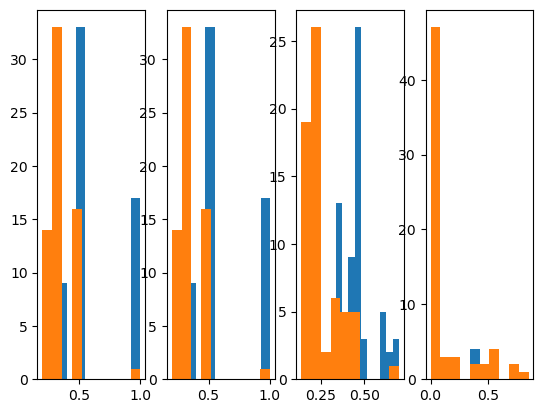

In [35]:
og = ['Roof2FloorRatio', 'Ground2FloorRatio', 'Floor2Fac', 'Core2Perimeter']
new = ['roof_2_footprint', 'ground_2_footprint', 'floor_2_facade', 'core_2_perim']
fig, ax = plt.subplots(1, 4)
for i, (o, n) in enumerate(zip(og, new)):
    ax[i].hist(df[o], label="UMI version")
    ax[i].hist(new_sbs[n], label="UMI version")
plt.show()

In [ ]:
# Make epjsons out of each
for row in new_sbs.iterrows():
    umi_test
    row[]

# Run epjsons
epjson_from_shoeboxerv2_results = {}

## 4. Compare epjsons

## 5. Run surrogate for built v2 shoeboxes & compare